In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('science')

In [94]:
import os
import pandas as pd
from scipy.ndimage import gaussian_filter
from scipy.interpolate import interp1d
import numpy as np

# Directory containing your data
data_dir = '/home/marianne/Desktop/NEW_SPECTRAL_PROCESSING/Spectral-Processing/Spectra/DATA/Aerosol_Data/'

# Names of the compounds to look for in files
compounds = ['Al2O3', 'CaSiO4', 'CaTiO3', 'Cr', 'Fe', 'KCl', 'Mg2SiO4', 'MnS', 'Na2S', 'SiO2', 'VO', 'Ni', 'ZnS']

# New directory to save the processed tables
new_dir = '/home/marianne/Desktop/NEW_SPECTRAL_PROCESSING/Spectral-Processing/Spectra/DATA/Inverted_Aerosol_Data/'
os.makedirs(new_dir, exist_ok=True)

# Parameters for Gaussian smoothing
sigma = 1  # Increased standard deviation for stronger Gaussian smoothing

# Keep track of unmatched files
unmatched_files = []

matches = 0
# Loop through the files in the directory
for file_name in os.listdir(data_dir):
    matched = False
    # Check if the file name contains any of the compounds we're interested in
    for compound in compounds:
        if compound in file_name:
            matches += 1
            print(file_name)
            matched = True
            # Construct the full file path
            file_path = os.path.join(data_dir, file_name)
            
            # Load the data into a DataFrame
            df = pd.read_csv(file_path, delim_whitespace=True, header=None)
            
            # Apply Gaussian smoothing to the data
            smoothed_data = gaussian_filter(df.values, sigma=sigma)

            # Interpolate to get 5000 points along the y-axis
            y_original = np.arange(smoothed_data.shape[0])
            y_new = np.linspace(0, y_original[-1], 500)
            interpolated_data = np.array([interp1d(y_original, column, kind='cubic')(y_new) for column in smoothed_data.T]).T

            # Convert the interpolated data back to a DataFrame
            interpolated_df = pd.DataFrame(interpolated_data)
            
            # Construct the new file path
            new_file_path = os.path.join(new_dir, file_name)
            
            # Save the interpolated DataFrame with 4 decimal places
            interpolated_df.to_csv(new_file_path, index=False, header=None, float_format='%.4f', sep=' ')

            break  # Exit the loop after processing a matching file

print(matches)

Ni_wav_pi0.txt
Fe_wav_gg.txt
SiO2_wav_pi0.txt
Cr_wav_qext.txt
Fe_wav_pi0.txt
Mg2SiO4_wav_pi0.txt
MnS_wav_qext.txt
CaSiO4_wav_pi0.txt
CaTiO3_wav_pi0.txt
Al2O3_wav_pi0.txt
SiO2_wav_gg.txt
Ni_wav_qext.txt
Mg2SiO4_wav_qext.txt
Na2S_wav_pi0.txt
ZnS_wav_pi0.txt
Fe_wav_qext.txt
VO_wav_qext.txt
Ni_wav_gg.txt
KCl_wav_gg.txt
Na2S_wav_gg.txt
CaSiO4_wav_gg.txt
Mg2SiO4_wav_gg.txt
MnS_wav_gg.txt
ZnS_wav_qext.txt
Al2O3_wav_qext.txt
SiO2_wav_qext.txt
VO_wav_pi0.txt
Cr_wav_gg.txt
Na2S_wav_qext.txt
CaTiO3_wav_qext.txt
CaTiO3_wav_gg.txt
Cr_wav_pi0.txt
KCl_wav_qext.txt
KCl_wav_pi0.txt
ZnS_wav_gg.txt
MnS_wav_pi0.txt
Al2O3_wav_gg.txt
CaSiO4_wav_qext.txt
VO_wav_gg.txt
39


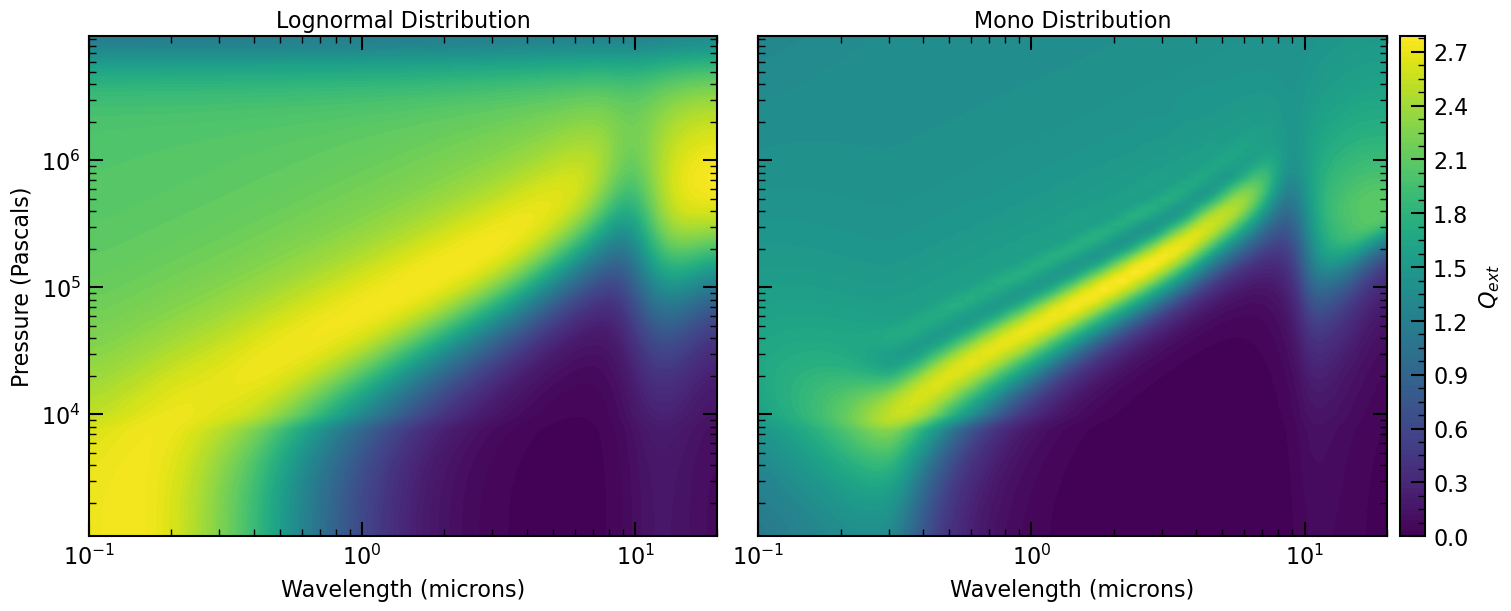

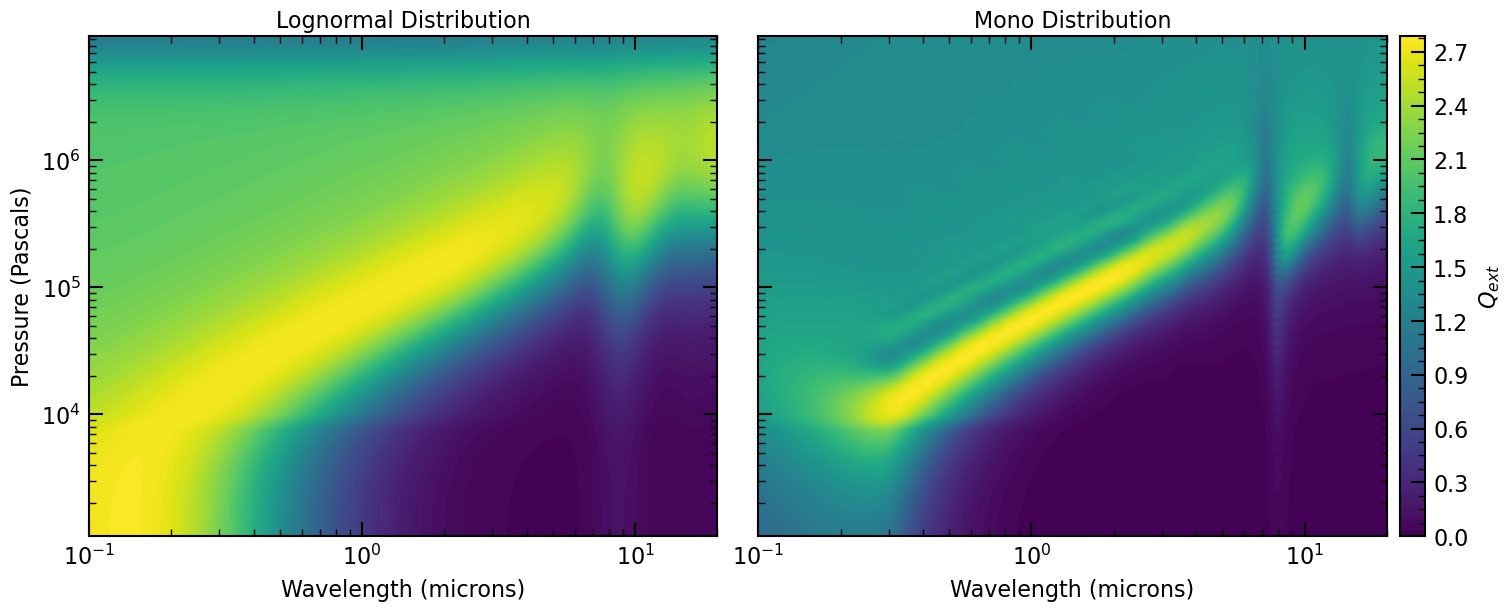

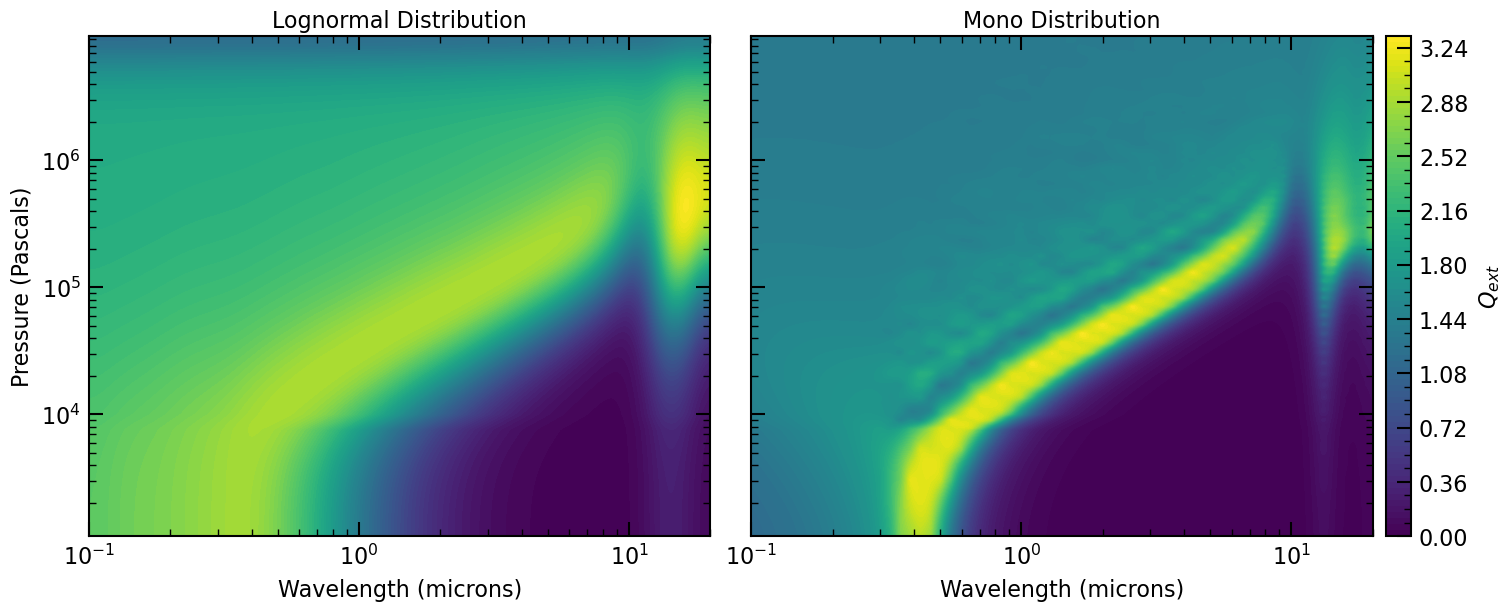

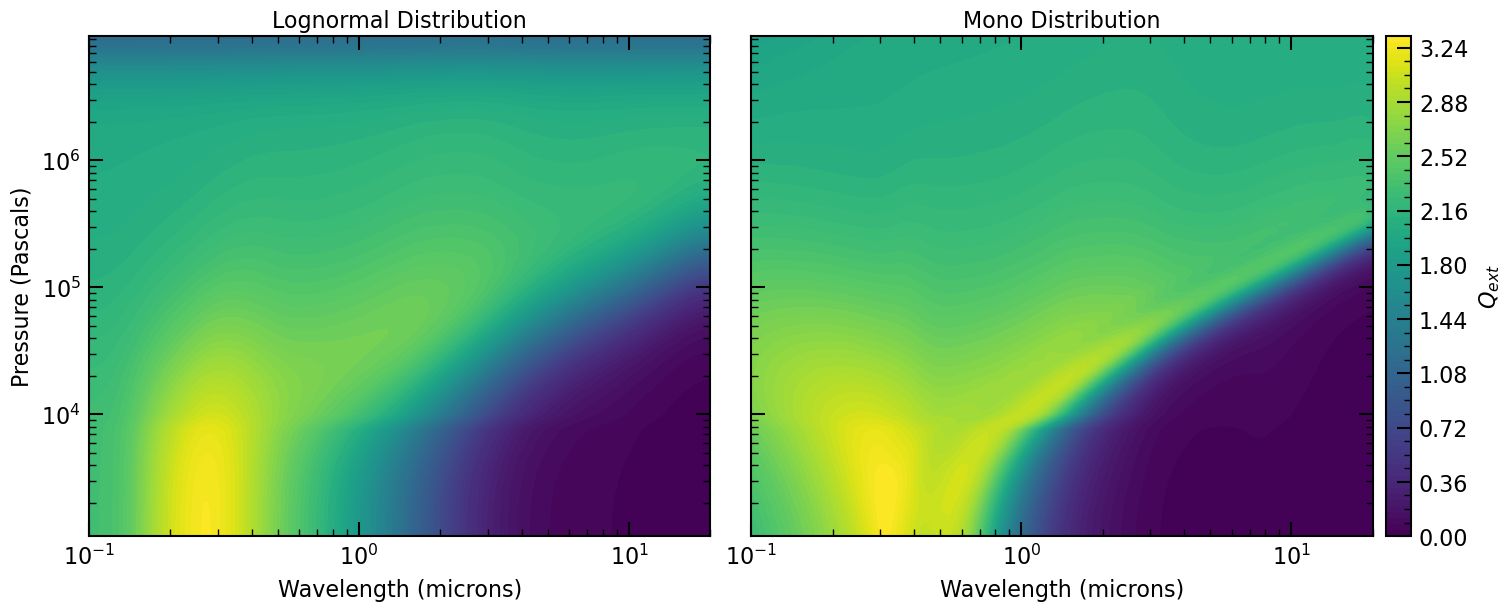

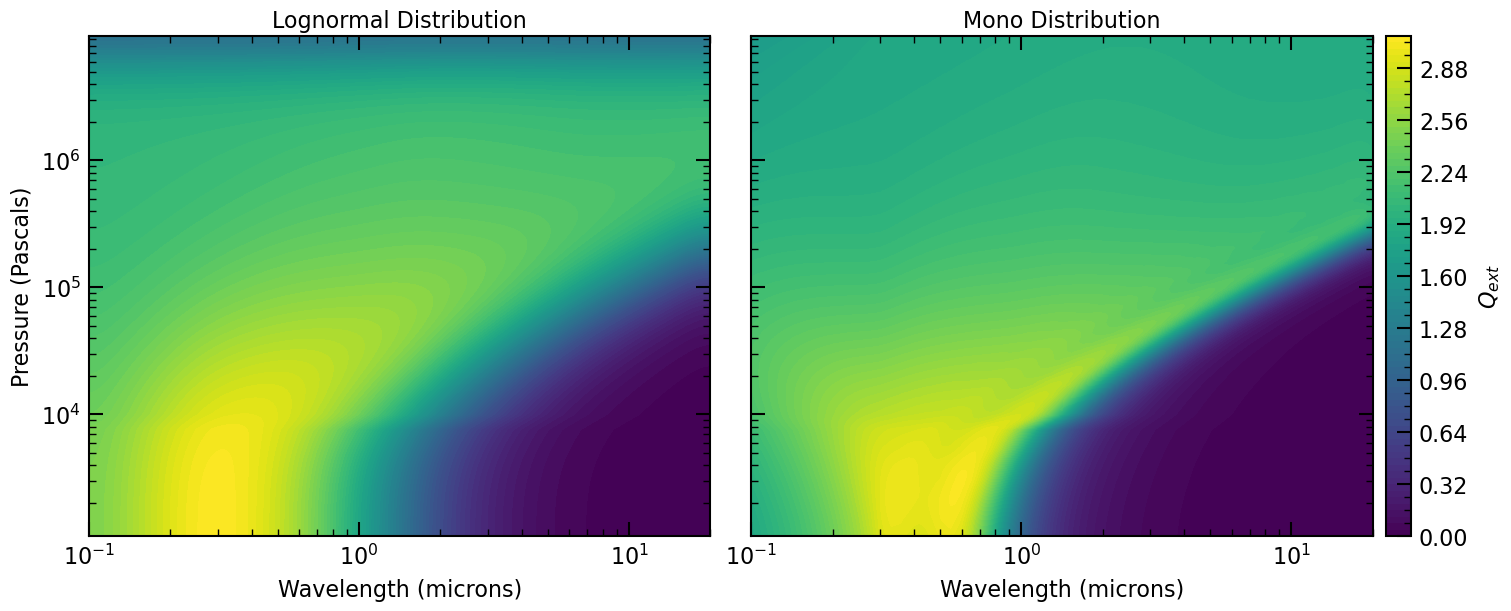

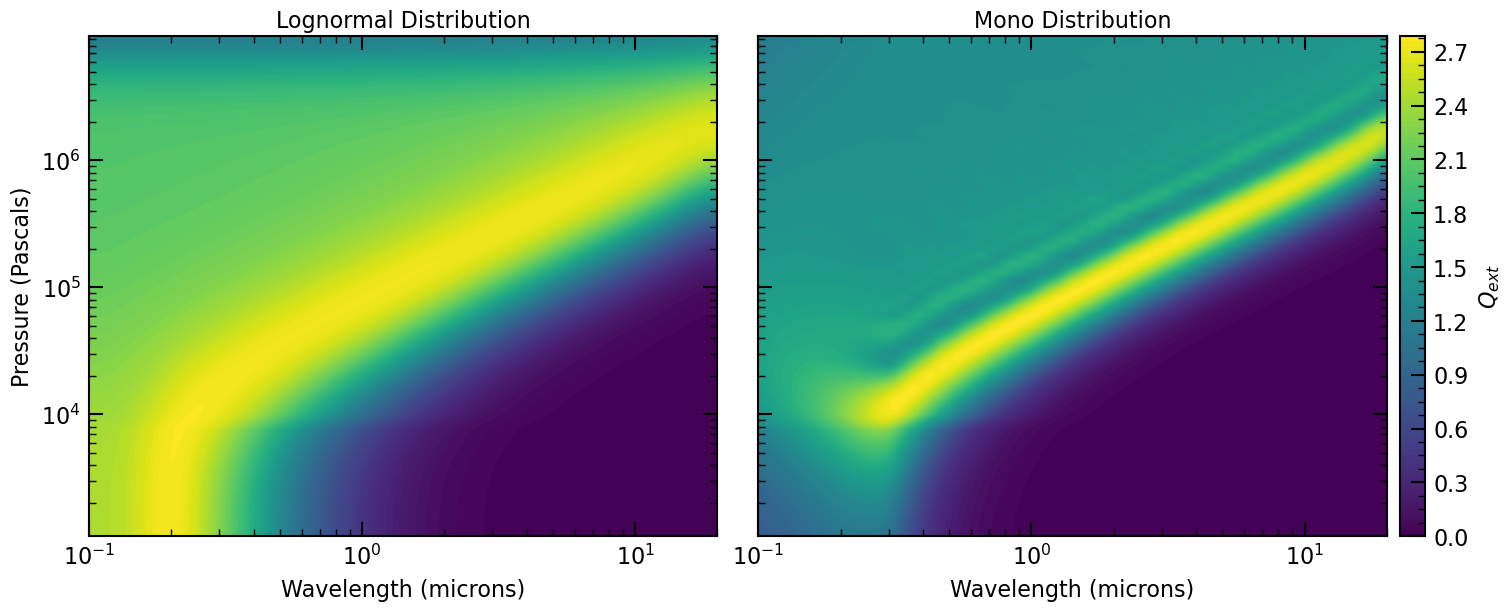

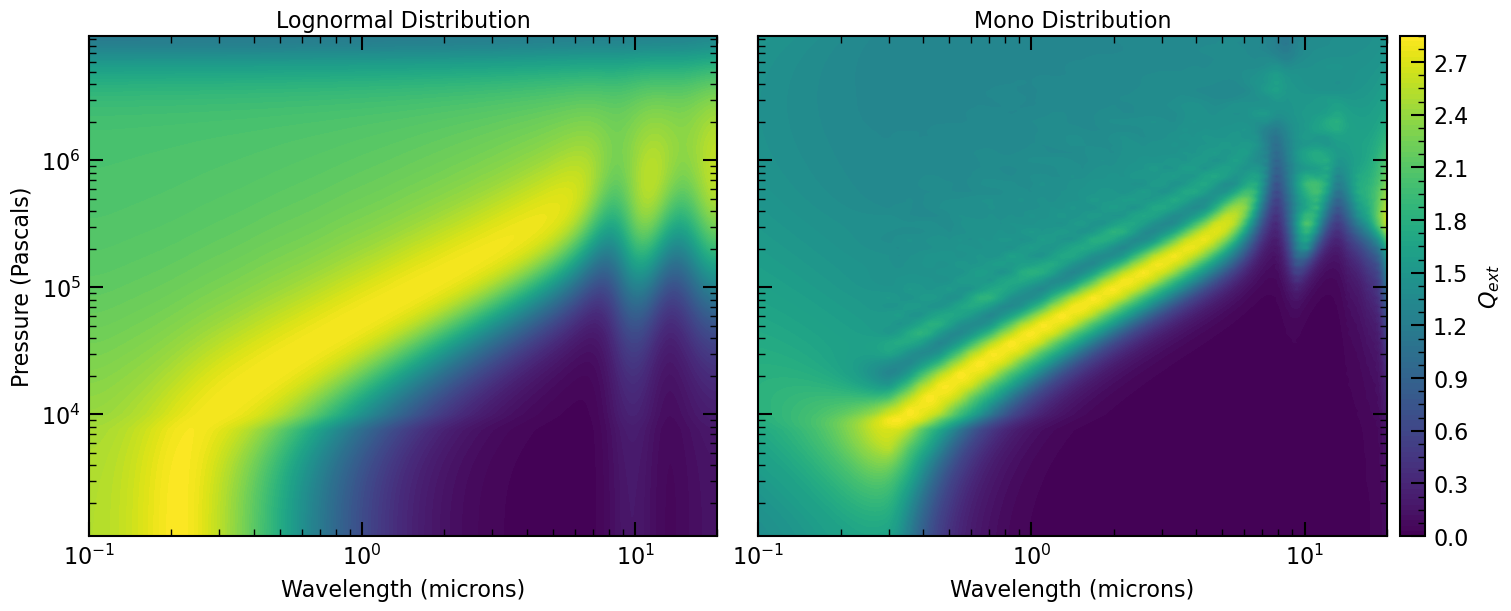

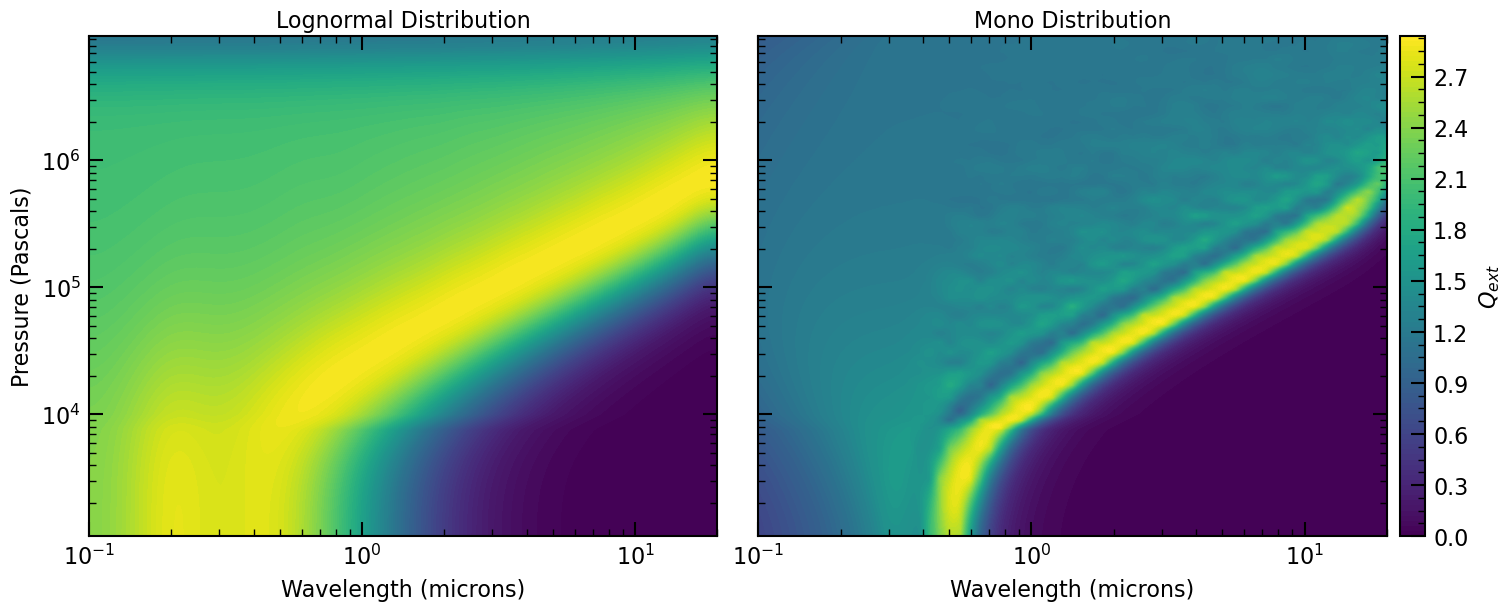

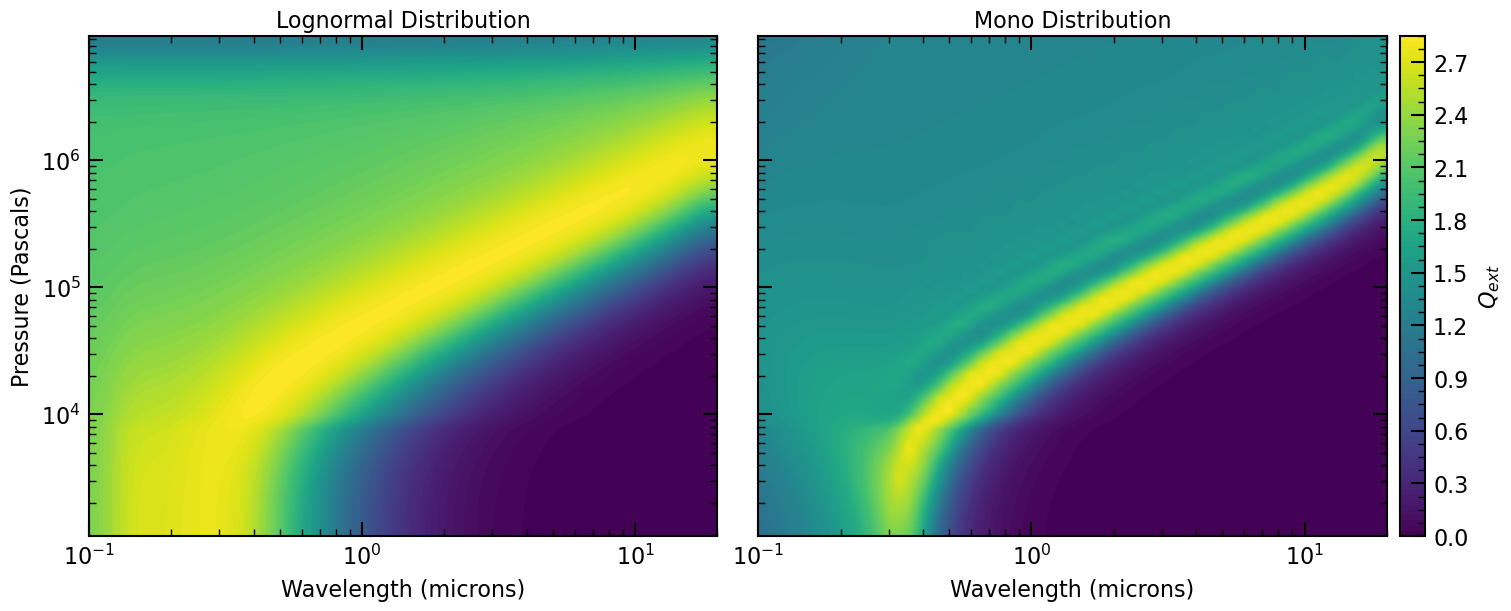

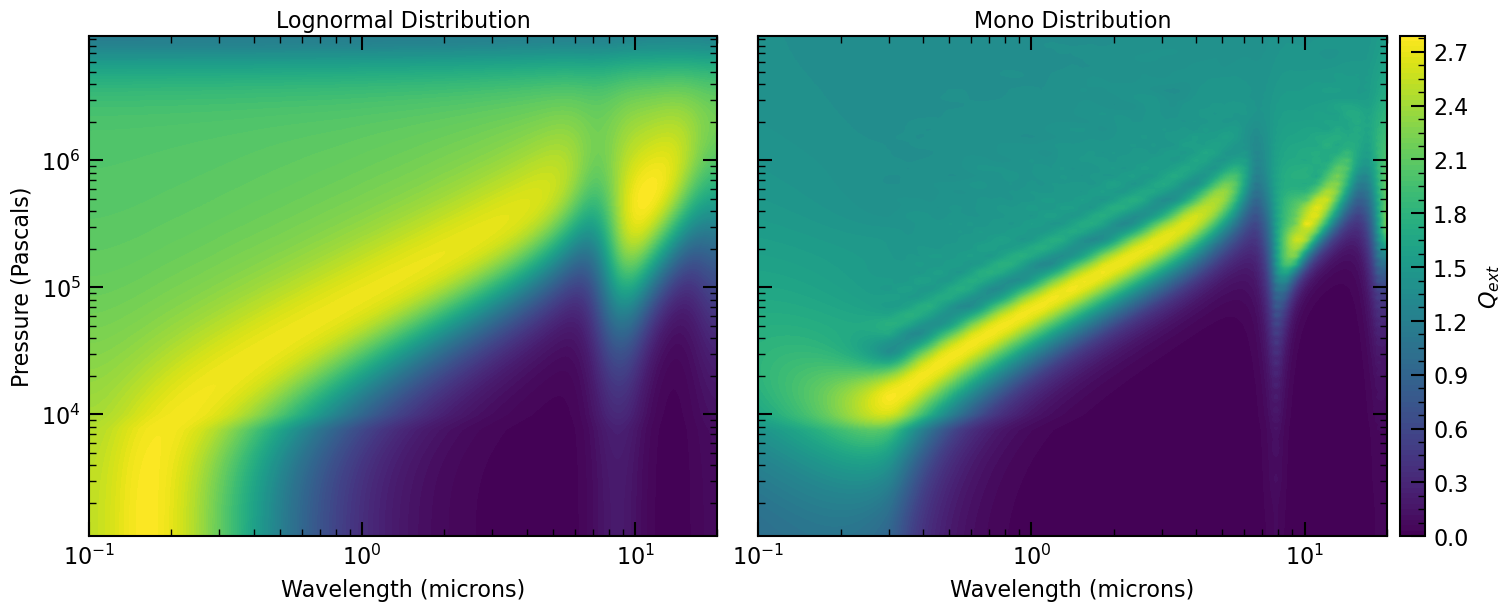

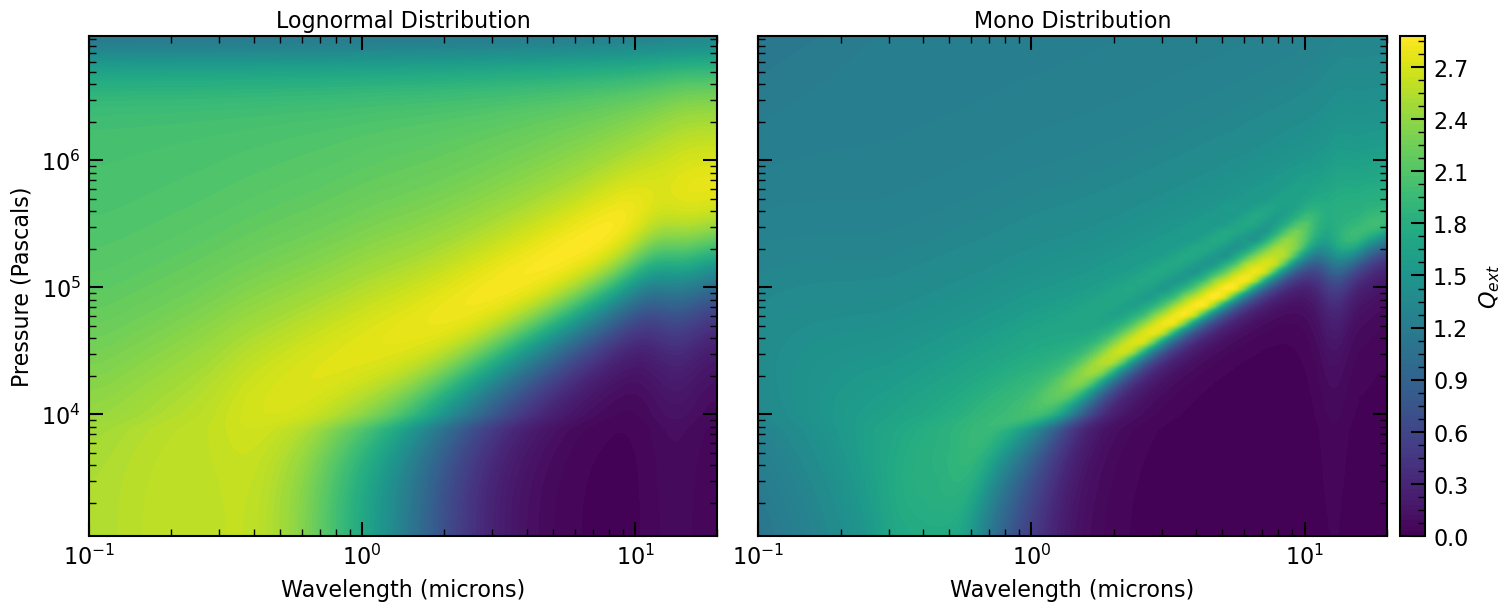

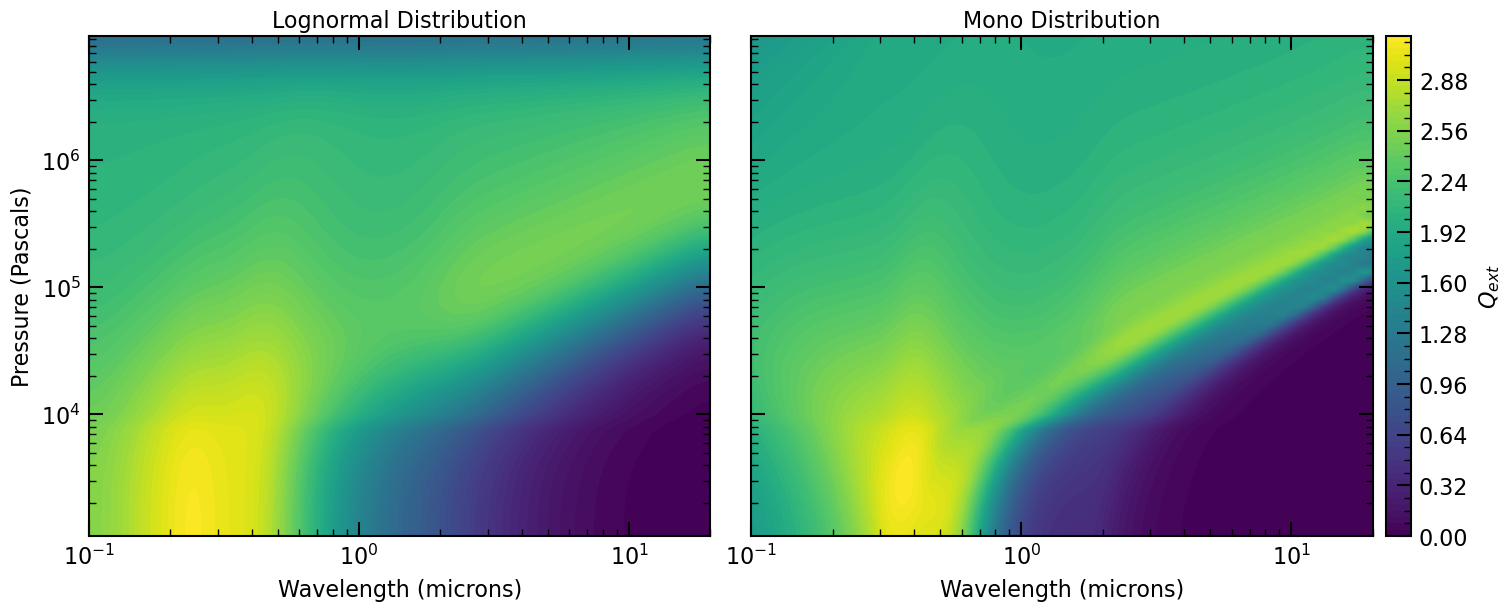

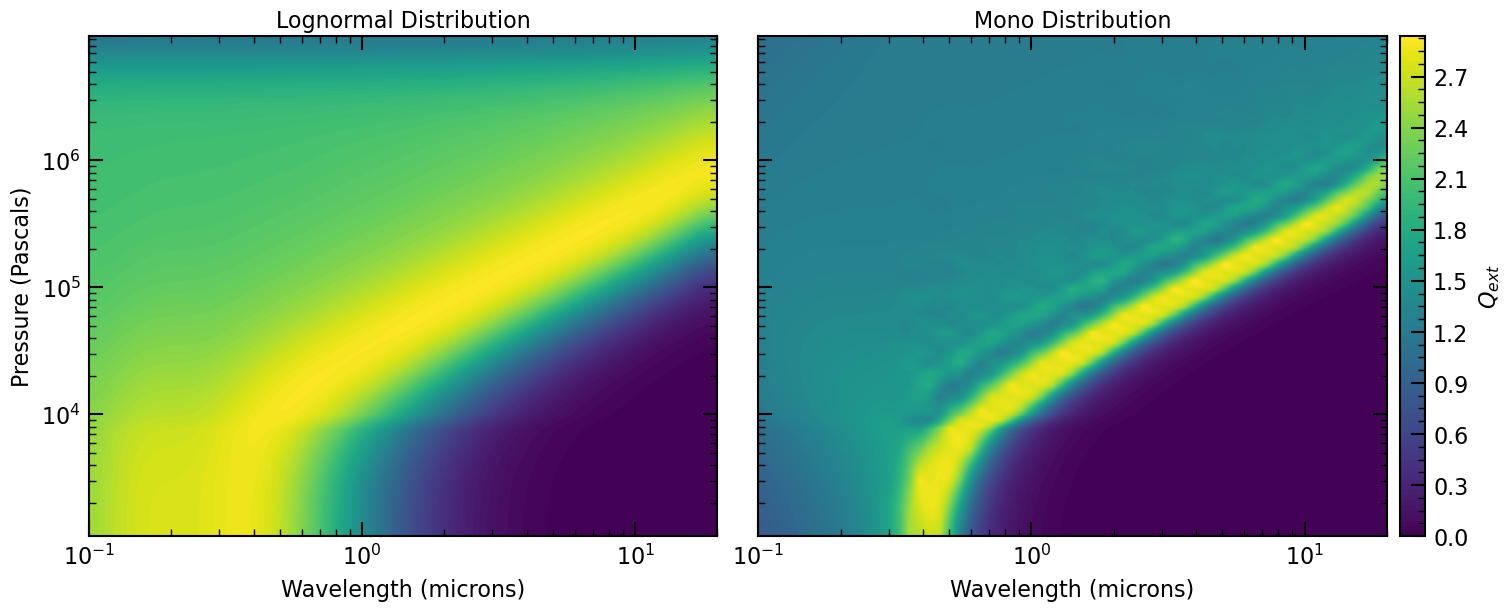

In [98]:
import numpy as np
import matplotlib.pyplot as plt

compounds = ['Al2O3', 'CaSiO4', 'CaTiO3', 'Cr', 'Fe',  'KCl', 'Mg2SiO4','MnS', 'Na2S', 'SiO2', 'VO', 'Ni', 'ZnS']

for compound in compounds:
    new_data = '/home/marianne/Desktop/NEW_SPECTRAL_PROCESSING/Spectral-Processing/Spectra/DATA/Inverted_Aerosol_Data/'+ compound +'_wav_qext.txt'
    old_data = '/home/marianne/Desktop/Poly-Spectra-Paper/OLDER_SCATTERING_DATA/'+ compound +'_wav_qext.txt'
    df_new = np.loadtxt(new_data)
    df_old = np.loadtxt(old_data)

    pressure_grid_file = '/home/marianne/Desktop/NEW_SPECTRAL_PROCESSING/Spectral-Processing/Spectra/DATA/Aerosol_Data/pressure_array_for_cloud_scattering_data_in_pascals.txt'
    wavelength_grid_file = '/home/marianne/Desktop/NEW_SPECTRAL_PROCESSING/Spectral-Processing/Spectra/DATA/Inverted_Aerosol_Data/wavelength_array_for_cloud_scattering_data_in_microns.txt' 
    pressure = np.loadtxt(pressure_grid_file)
    wavelength = np.loadtxt(wavelength_grid_file)

    # Create subplots side by side with shared y-axis and constrained layout
    fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True, constrained_layout=True)

    # Plot for new data
    contour_new = axs[0].contourf(wavelength, pressure, df_new, cmap='viridis', levels=100)
    axs[0].set_title('Lognormal Distribution')
    axs[0].set_xlabel('Wavelength (microns)')
    axs[0].set_ylabel('Pressure (Pascals)')
    axs[0].set_yscale('log')
    axs[0].set_xscale('log')

    # Plot for old data
    contour_old = axs[1].contourf(wavelength, pressure, df_old, cmap='viridis', levels=100)
    axs[1].set_title('Mono Distribution')
    axs[1].set_xlabel('Wavelength (microns)')
    axs[1].set_yscale('log')
    axs[1].set_xscale('log')

    # Create a color bar for the whole figure that applies to both subplots
    fig.colorbar(contour_new, ax=axs, orientation='vertical', label=r'$Q_{ext}$', pad=0.01)

    #plt.show()
    plt.savefig('Figures/Optical_Property_Differences_' + compound + '.png', bbox_inches='tight', dpi=100)

In [96]:
# Generate numbers in log space from 0.1 to 20
log_space_numbers = np.logspace(np.log10(0.1), np.log10(20), num=500)

# Specify the file path
file_path = '/home/marianne/Desktop/NEW_SPECTRAL_PROCESSING/Spectral-Processing/Spectra/DATA/Inverted_Aerosol_Data/wavelength_array_for_cloud_scattering_data_in_microns.txt'

# Save to a file
pd.Series(log_space_numbers).to_csv(file_path, index=False, header=False)